<a href="https://colab.research.google.com/github/KareemEzzaldin/Machine-Learning-Model-For-Customer-Churn-Prediction/blob/main/ML_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -U imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder
from sklearn.linear_model import LogisticRegression, ElasticNet, ElasticNetCV , LogisticRegressionCV, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score  , mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingRegressor, StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
plt.style.use("fivethirtyeight")


In [3]:
df_train = pd.read_csv("/content/customer_churn_dataset-training-master.csv")
df_test = pd.read_csv("/content/customer_churn_dataset-testing-master.csv")

## Data Preprocessing and solving unbalancing

### Train Data

In [4]:
df_train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [5]:
df_train.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [6]:
df_train.dropna(inplace=True)

In [7]:
df_train.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [8]:
df_train.duplicated().sum()

np.int64(0)

In [9]:
x = df_train.drop("Churn", axis=1)
y = df_train['Churn']

In [10]:
y.value_counts()

,count
Churn,
1.0,249999
0.0,190833


unbalancing in the churn data

Counter({1.0: 249999, 0.0: 190833})


<Axes: ylabel='count'>

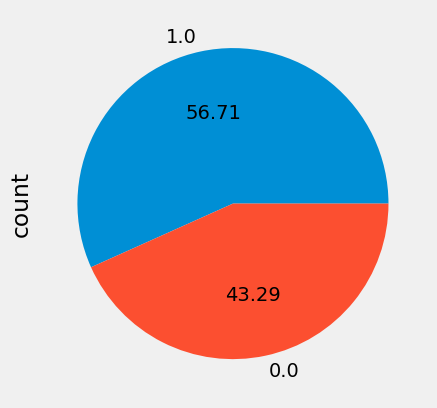

In [11]:
from enum import auto
from collections import Counter
print(Counter(y))
y.value_counts().plot.pie(autopct='%.2f')

Using random over sampler

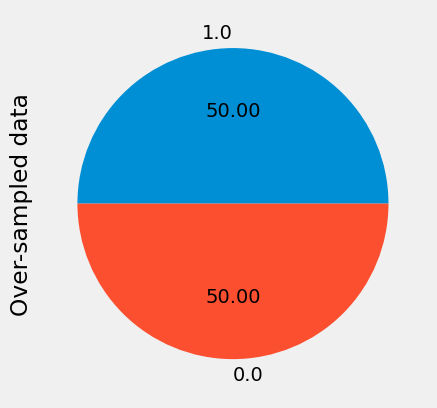

In [12]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)
y_ros = pd.Series(y_ros, name = "Balanced Churn")
ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_ylabel('Over-sampled data')
Balanced_df_train = pd.concat([pd.DataFrame(x_ros), y_ros], axis=1)

In [13]:
Balanced_df_train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Balanced Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
499993,421194.0,42.0,Male,48.0,28.0,3.0,2.0,Premium,Quarterly,989.13,5.0,0.0
499994,320297.0,50.0,Male,24.0,14.0,2.0,5.0,Basic,Quarterly,962.33,29.0,0.0
499995,425646.0,44.0,Male,35.0,9.0,2.0,17.0,Standard,Quarterly,685.73,21.0,0.0
499996,164702.0,50.0,Male,46.0,20.0,3.0,9.0,Basic,Quarterly,914.00,24.0,0.0


In [14]:
Balanced_df_train.duplicated().sum()

np.int64(59166)

In [15]:
Balanced_df_train.drop_duplicates(inplace=True)

In [16]:
Balanced_df_train.duplicated().sum()

np.int64(0)

### Test Data

In [17]:
df_test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [18]:
df_test.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [19]:
df_test.dropna(inplace=True)

In [20]:
df_test.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [21]:
df_test.duplicated().sum()

np.int64(0)

In [22]:
x_test = df_test.drop("Churn", axis=1)
y_test = df_test['Churn']

In [23]:
y_test.value_counts()

,count
Churn,
0,33881
1,30493


unbalancing in the churn data

Counter({1.0: 249999, 0.0: 190833})


<Axes: ylabel='count'>

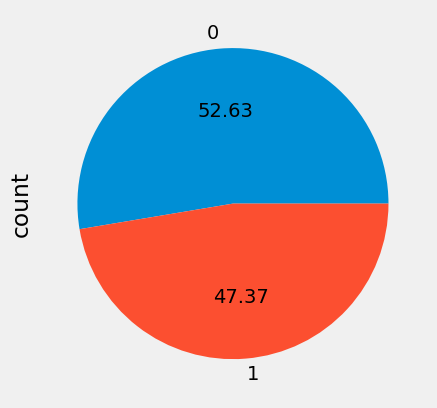

In [24]:
from enum import auto
from collections import Counter
print(Counter(y))
y_test.value_counts().plot.pie(autopct='%.2f')

Using random over sampler

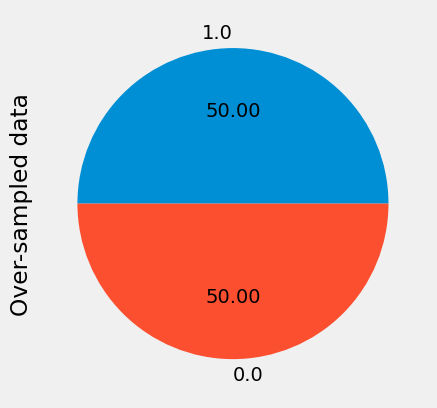

In [25]:
from imblearn.over_sampling import RandomOverSampler
ros_test = RandomOverSampler(random_state=42)
x_ros_test, y_ros_test = ros_test.fit_resample(x, y)
y_ros_test = pd.Series(y_ros_test, name = "Balanced Churn")
ax_test = y_ros_test.value_counts().plot.pie(autopct='%.2f')
_ = ax_test.set_ylabel('Over-sampled data')
Balanced_df_test = pd.concat([pd.DataFrame(x_ros_test), y_ros_test], axis=1)

In [26]:
Balanced_df_test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Balanced Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
499993,421194.0,42.0,Male,48.0,28.0,3.0,2.0,Premium,Quarterly,989.13,5.0,0.0
499994,320297.0,50.0,Male,24.0,14.0,2.0,5.0,Basic,Quarterly,962.33,29.0,0.0
499995,425646.0,44.0,Male,35.0,9.0,2.0,17.0,Standard,Quarterly,685.73,21.0,0.0
499996,164702.0,50.0,Male,46.0,20.0,3.0,9.0,Basic,Quarterly,914.00,24.0,0.0


In [27]:
Balanced_df_test.duplicated().sum()

np.int64(59166)

In [28]:
Balanced_df_test.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [29]:
Balanced_df_test.drop_duplicates(inplace=True)

In [30]:
Balanced_df_test.duplicated().sum()

np.int64(0)

## Buliding the model

In [31]:
x_train_df = Balanced_df_train.drop("Balanced Churn", axis=1)
y_train = Balanced_df_train['Balanced Churn']

In [32]:
x_test_df = Balanced_df_test.drop("Balanced Churn", axis=1)
y_test = Balanced_df_test['Balanced Churn']

In [33]:
categorical_cols = Balanced_df_test.select_dtypes(include='object').columns
print(f"Categorical columns: {categorical_cols}")
if len(categorical_cols) > 0:
    data = pd.get_dummies(Balanced_df_test, columns=categorical_cols, drop_first=True)

Categorical columns: Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')


In [34]:
categorical_cols = Balanced_df_train.select_dtypes(include='object').columns
print(f"Categorical columns: {categorical_cols}")
if len(categorical_cols) > 0:
    data = pd.get_dummies(Balanced_df_train, columns=categorical_cols, drop_first=True)

Categorical columns: Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')


In [35]:
# Identify categorical and numerical columns
categorical_cols = x_train_df.select_dtypes(include='object').columns
numerical_cols = x_train_df.select_dtypes(include=np.number).columns

In [36]:
# Apply one-hot encoding to categorical columns
x_train_encoded = pd.get_dummies(x_train_df, columns=categorical_cols, drop_first=True)
x_test_encoded = pd.get_dummies(x_test_df, columns=categorical_cols, drop_first=True)

In [37]:
# Ensure both train and test sets have the same columns after one-hot encoding
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)

In [38]:
# Scale the numerical features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded[numerical_cols])
x_test_scaled = scaler.transform(x_test_encoded[numerical_cols])

In [39]:
# Combine scaled numerical features with one-hot encoded categorical features
x_train = np.concatenate([x_train_scaled, x_train_encoded.drop(numerical_cols, axis=1)], axis=1)
x_test = np.concatenate([x_test_scaled, x_test_encoded.drop(numerical_cols, axis=1)], axis=1)

In [40]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    return accuracy, precision, recall, f1, confusion, report


In [41]:
Logistic_model = LogisticRegression(max_iter = 1500)
Logistic_model.fit(x_train, y_train)
y_pred_Logistic = Logistic_model.predict(x_test)

In [42]:
Logistic_metrics = evaluate_model(y_test, y_pred_Logistic)
print("Logistic Model Evaluation:")
print("Accuracy:", Logistic_metrics[0])
print("Precision:", Logistic_metrics[1])
print("Recall:", Logistic_metrics[2])
print("F1-Score:", Logistic_metrics[3])
print("Confusion Matrix:\n", Logistic_metrics[4])
print("Classification Report:\n", Logistic_metrics[5])

Logistic Model Evaluation:
Accuracy: 0.9806184668989547
Precision: 0.9846644854372829
Recall: 0.9811039244156977
F1-Score: 0.9828809803363695
Confusion Matrix:
 [[187013   3820]
 [  4724 245275]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    190833
         1.0       0.98      0.98      0.98    249999

    accuracy                           0.98    440832
   macro avg       0.98      0.98      0.98    440832
weighted avg       0.98      0.98      0.98    440832

